# Explore stock exchange data

In [77]:
# Your environment is probably missing some packages. We will check and, if necessary, install.
# https://pypi.org/project/yfinance
import pip
from pip._internal.utils.misc import get_installed_distributions
pkgs = ''.join(str(get_installed_distributions(local_only=True)))
if "yfinance" not in pkgs:
    !pip install yfinance
if "lxml" not in pkgs:
    !pip install lxml 

In [78]:
# Now we can import yfinance
import yfinance as yf
import pandas as pd
from pathlib import Path

In [79]:
# Let's define some useful constants
START = "2020-01-02"
END   = "2020-11-24"

company_name = 'AAPL'

TICKERS = [company_name]

DATAFILE_NAME = "data.pickle1" + company_name

In [80]:
# It's practical to download data from Yahoo!Finance just once and keep a local copy
if Path(DATAFILE_NAME).is_file(): # check if we got the datafile already
    data = pd.read_pickle(DATAFILE_NAME) # read it
else:
    data = yf.download(tickers=TICKERS, start=START, end=END, auto_adjust=True)
    data.to_pickle(DATAFILE_NAME) # save locally

In [81]:
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,72.829608,73.901504,72.571473,73.840042,135480400
2020-01-03,73.053317,73.896570,72.893519,73.122154,146322800
2020-01-06,72.227286,73.744155,71.971603,73.704819,118387200
2020-01-07,73.714658,73.975255,73.134463,73.358185,108872000
2020-01-08,73.055784,74.845547,73.055784,74.538239,132079200


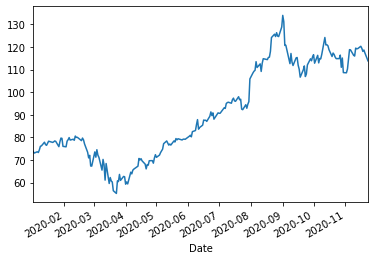

In [82]:
# let's see what the closing values look like

data['Close'].plot()

In [83]:
data.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2020-11-17,119.550003,120.669998,118.959999,119.389999,74271000
2020-11-18,118.610001,119.820000,118.000000,118.029999,76322100
2020-11-19,117.589996,119.059998,116.809998,118.639999,74113000
2020-11-20,118.639999,118.769997,117.290001,117.339996,73391400
2020-11-23,117.180000,117.620003,113.750000,113.849998,127959300


In [84]:
# new column with the difference between the highest and lowest values of the day

data['Intraday volatility'] = data['High'] - data['Low']

In [85]:
data.head()

,Open,High,Low,Close,Volume,Intraday volatility
Date,,,,,,
2020-01-02,72.829608,73.901504,72.571473,73.840042,135480400,1.330031
2020-01-03,73.053317,73.896570,72.893519,73.122154,146322800,1.003051
2020-01-06,72.227286,73.744155,71.971603,73.704819,118387200,1.772552
2020-01-07,73.714658,73.975255,73.134463,73.358185,108872000,0.840791
2020-01-08,73.055784,74.845547,73.055784,74.538239,132079200,1.789763


In [86]:
# see statistics

data.describe()

,Open,High,Low,Close,Volume,Intraday volatility
count,227.000000,227.000000,227.000000,227.000000,2.270000e+02,227.000000
mean,91.254333,92.621863,89.899420,91.310815,1.552821e+08,2.722443
std,20.804535,20.888591,20.282658,20.546309,7.775882e+07,1.704111
min,56.205776,56.309277,52.393503,55.291519,2.045080e+07,0.658867
25%,74.766826,75.081087,73.975164,74.727455,1.082268e+08,1.485395
50%,87.020200,87.989280,85.876737,87.122337,1.382355e+08,2.256110
75%,113.783694,115.201250,112.016742,113.129826,1.909609e+08,3.420911
max,137.353033,137.742360,130.305191,133.948898,4.268848e+08,12.787935


In [87]:
# find the day with the biggest difference between high and low

data[data['Intraday volatility'] == data['Intraday volatility'].max()]

,Open,High,Low,Close,Volume,Intraday volatility
Date,,,,,,
2020-09-04,119.863204,123.48695,110.699015,120.751671,332607200,12.787935


In [88]:
# find the day with the smallest difference between high and low

data[data['Intraday volatility'] == data['Intraday volatility'].min()]

,Open,High,Low,Close,Volume,Intraday volatility
Date,,,,,,
2020-01-22,78.321815,78.66846,78.009593,78.105476,101832400,0.658867


In [89]:
# new column with the change from open to close

data['Day change'] = data['Close'] - data['Open']
data.head()

,Open,High,Low,Close,Volume,Intraday volatility,Day change
Date,,,,,,,
2020-01-02,72.829608,73.901504,72.571473,73.840042,135480400,1.330031,1.010434
2020-01-03,73.053317,73.896570,72.893519,73.122154,146322800,1.003051,0.068837
2020-01-06,72.227286,73.744155,71.971603,73.704819,118387200,1.772552,1.477533
2020-01-07,73.714658,73.975255,73.134463,73.358185,108872000,0.840791,-0.356473
2020-01-08,73.055784,74.845547,73.055784,74.538239,132079200,1.789763,1.482455


In [90]:
# the day with biggest rise

data[data['Day change'] == data['Day change'].max()]

,Open,High,Low,Close,Volume,Intraday volatility,Day change
Date,,,,,,,
2020-09-21,104.359952,110.000223,102.92243,109.890411,195713800,7.077793,5.530459


In [91]:
# the day with the biggest fall

data[data['Day change'] == data['Day change'].min()]

,Open,High,Low,Close,Volume,Intraday volatility,Day change
Date,,,,,,,
2020-09-10,120.152711,120.29247,112.306248,113.29454,182274400,7.986222,-6.858171


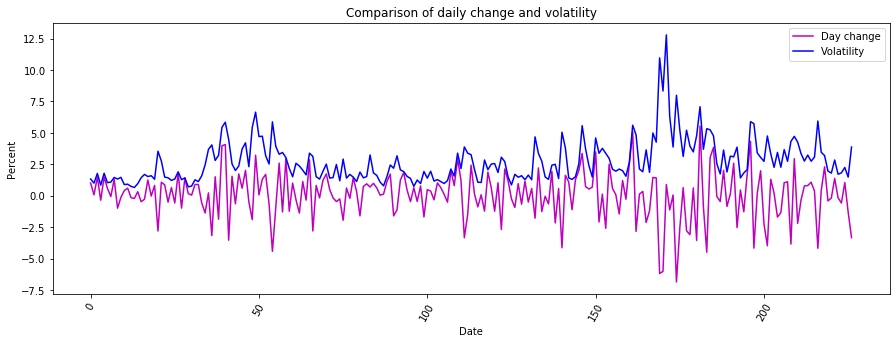

In [118]:
# compare the biggest daily volatility to the difference between opening and closing values
# first import matplotlib to get more control over the plots

import matplotlib.pyplot as plt

#data[['Day change', 'Intraday volatility']].plot()
plt.figure(figsize=(15,5))
plt.plot(data['Day change'], label='Day change', color='m')
plt.plot(data['Intraday volatility'], label='Volatility', color='b')
plt.xlabel('Date')
plt.ylabel('Percent')
plt.title('Comparison of daily change and volatility')
plt.xticks(rotation=60)
plt.legend()

In [93]:
# volatility as percent from opening value

data['Volatility %'] = data['Intraday volatility'] / data['Open'] * 100
data.head()

,Open,High,Low,Close,Volume,Intraday volatility,Day change,Volatility %
Date,,,,,,,,
2020-01-02,72.829608,73.901504,72.571473,73.840042,135480400,1.330031,1.010434,1.826223
2020-01-03,73.053317,73.896570,72.893519,73.122154,146322800,1.003051,0.068837,1.373039
2020-01-06,72.227286,73.744155,71.971603,73.704819,118387200,1.772552,1.477533,2.454131
2020-01-07,73.714658,73.975255,73.134463,73.358185,108872000,0.840791,-0.356473,1.140603
2020-01-08,73.055784,74.845547,73.055784,74.538239,132079200,1.789763,1.482455,2.449858


In [94]:
# daily change as percent from opening value

data['Change %'] = data['Day change'] / data['Open'] * 100
data.head()

,Open,High,Low,Close,Volume,Intraday volatility,Day change,Volatility %,Change %
Date,,,,,,,,,
2020-01-02,72.829608,73.901504,72.571473,73.840042,135480400,1.330031,1.010434,1.826223,1.387394
2020-01-03,73.053317,73.896570,72.893519,73.122154,146322800,1.003051,0.068837,1.373039,0.094228
2020-01-06,72.227286,73.744155,71.971603,73.704819,118387200,1.772552,1.477533,2.454131,2.045672
2020-01-07,73.714658,73.975255,73.134463,73.358185,108872000,0.840791,-0.356473,1.140603,-0.483585
2020-01-08,73.055784,74.845547,73.055784,74.538239,132079200,1.789763,1.482455,2.449858,2.029209


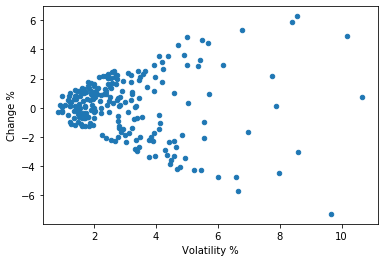

In [95]:
# relationship between daily volatility and change in a scatter plot

data.plot.scatter('Volatility %', 'Change %')

In [96]:
# percentual rise from the bottom to the last day of the sample

"{:.1%}".format(data.iloc[-1, 3] / data['Close'].min())


'205.9%'

In [98]:
# create a new dataframe with a 'Month' column

data.reset_index(inplace=True)
data['Month'] = pd.DatetimeIndex(data['Date']).month
#data['Month'] = pd.to_datetime(data['Date']).dt.to_period('M')
monthly = data[['Close', 'Volume', 'Volatility %', 'Month']]
monthly.head()

,Close,Volume,Volatility %,Month
0,73.840042,135480400,1.826223,1
1,73.122154,146322800,1.373039,1
2,73.704819,118387200,2.454131,1
3,73.358185,108872000,1.140603,1
4,74.538239,132079200,2.449858,1


In [99]:
# group by month

monthly = monthly.groupby('Month').mean()
monthly

,Close,Volume,Volatility %
Month,,,
1,76.683544,1.397319e+08,1.765720
2,76.667296,1.589395e+08,2.849690
3,64.674122,2.854578e+08,5.730479
4,67.124153,1.555297e+08,2.856886
5,77.024037,4.584726e+07,2.236395
6,86.147373,1.474262e+08,2.516198
7,95.229960,1.372953e+08,2.415129
8,117.059875,1.938392e+08,2.570865
9,114.926960,1.850365e+08,4.655151


In [101]:
monthly.reset_index(inplace=True)

monthly

,Month,Close,Volume,Volatility %
0,1,76.683544,1.397319e+08,1.765720
1,2,76.667296,1.589395e+08,2.849690
2,3,64.674122,2.854578e+08,5.730479
3,4,67.124153,1.555297e+08,2.856886
4,5,77.024037,4.584726e+07,2.236395
5,6,86.147373,1.474262e+08,2.516198
6,7,95.229960,1.372953e+08,2.415129
7,8,117.059875,1.938392e+08,2.570865
8,9,114.926960,1.850365e+08,4.655151
9,10,116.212687,1.315917e+08,2.876872


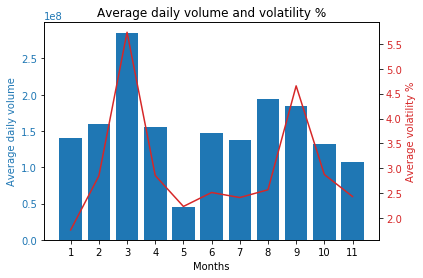

In [127]:
# plot average daily volume and volatility % in the same figure

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Months')
ax1.set_ylabel('Average daily volume', color=color)
ax1.bar(monthly['Month'], monthly['Volume'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(monthly['Month'])
ax1.set_title('Average daily volume and volatility %')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Average volatility %', color=color)  # we already handled the x-label with ax1
ax2.plot(monthly['Month'], monthly['Volatility %'], color=color)
ax2.tick_params(axis='y', labelcolor=color)



array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f41750bb450>,
      dtype=object)

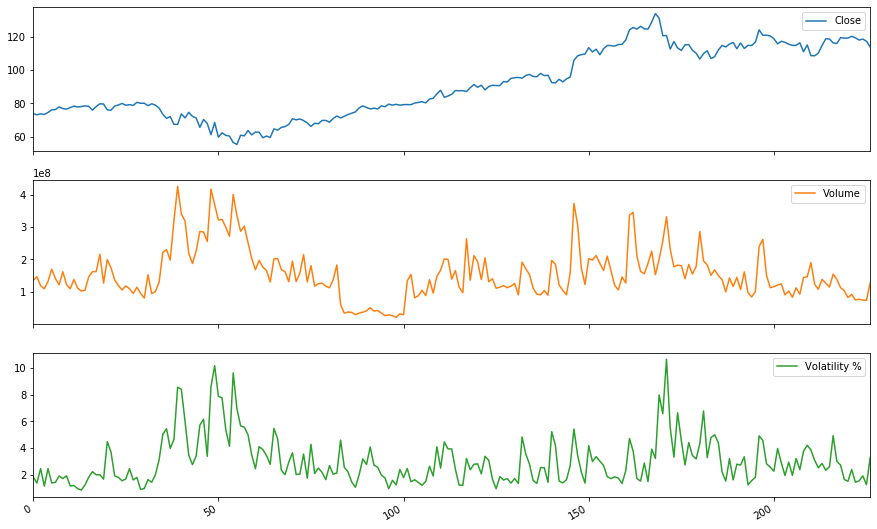

In [119]:
# alkuperäisestä datasta päivän päätösarvo, vaihto ja volatiliteettiprosentti allekkaisiin kuvaajiin

data[['Close', 'Volume', 'Volatility %']].plot(subplots=True, figsize=(15, 10))

In [123]:
# liukuva keskiarvo päivän päätösarvosta

data['Rolling close'] = data['Close'].rolling(7, min_periods=1).mean()
data

,index,Date,Open,High,Low,Close,Volume,Intraday volatility,Day change,Volatility %,Change %,Month,Rolling close
0,0,2020-01-02,72.829608,73.901504,72.571473,73.840042,135480400,1.330031,1.010434,1.826223,1.387394,1,73.840042
1,1,2020-01-03,73.053317,73.896570,72.893519,73.122154,146322800,1.003051,0.068837,1.373039,0.094228,1,73.481098
2,2,2020-01-06,72.227286,73.744155,71.971603,73.704819,118387200,1.772552,1.477533,2.454131,2.045672,1,73.555672
3,3,2020-01-07,73.714658,73.975255,73.134463,73.358185,108872000,0.840791,-0.356473,1.140603,-0.483585,1,73.506300
4,4,2020-01-08,73.055784,74.845547,73.055784,74.538239,132079200,1.789763,1.482455,2.449858,2.029209,1,73.712688
...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,222,2020-11-17,119.550003,120.669998,118.959999,119.389999,74271000,1.709999,-0.160004,1.430363,-0.133838,11,118.562857
223,223,2020-11-18,118.610001,119.820000,118.000000,118.029999,76322100,1.820000,-0.580002,1.534440,-0.488999,11,118.807143
224,224,2020-11-19,117.589996,119.059998,116.809998,118.639999,74113000,2.250000,1.050003,1.913428,0.892936,11,119.188571
225,225,2020-11-20,118.639999,118.769997,117.290001,117.339996,73391400,1.479996,-1.300003,1.247468,-1.095754,11,118.881428


Text(0.5, 1.0, '7-day rolling close values')

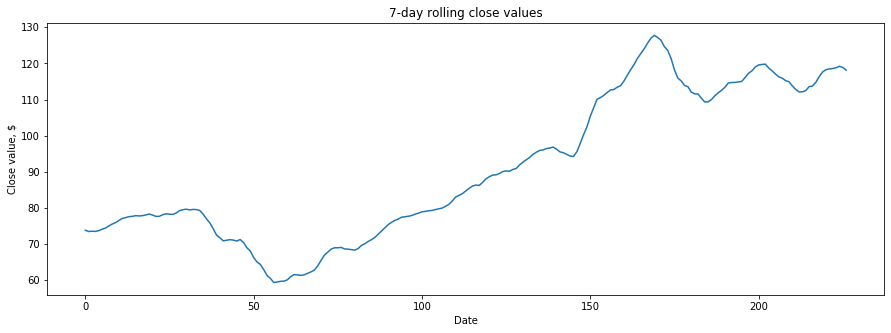

In [126]:
# plot rolling close values

plt.figure(figsize=(15,5))
plt.plot(data['Rolling close'])

plt.xlabel('Date')
plt.ylabel('Close value, $')
plt.title('7-day rolling close values')
